In [1]:
import numpy as np
import matplotlib.pyplot as plt

import symmetric_methods as sm


In [2]:
# MLP structure

L = 2

dim = np.zeros((L+1,))

dim[0] = 5
dim[1] = 6
dim[2] = 7
#dim[3] = 6
#dim[4] = 7
#dim[5] = 8
#dim[6] = 9
#dim[7] = 10
#dim[8] = 11
#dim[9] = 12

dim= dim.astype(int)


In [3]:
# draw random parameters, generate matrix and make it positive definite 

phi = np.random.normal(0,1,(L-2,))
PHI1 = np.random.normal(0,1,(dim[0],dim[0]))
PHI1 = PHI1 + PHI1.T
PHIL = np.random.normal(0,1,(dim[L],dim[L]))
PHIL = PHIL + PHIL.T
PSI1 = []
if L==2:
    PSI1 = np.random.normal(0,1,(dim[0],dim[2]))
    
covg = sm.par2cov(L,dim,phi,PHI1,PSI1,PHIL)


covg2 = covg @ covg
evl, evc = np.linalg.eigh(covg2)
sqrtcovg2 = (evc * np.sqrt(evl)) @ evc.T



In [4]:
# test the grad2par function with exact estimation

npar = 0
for iL in np.arange(0,L):
    npar = npar + dim[iL] * dim[iL+1]
npar = npar.astype(int)
    
grad = np.sqrt(npar) * sqrtcovg2

phiest,PHI1est,PSI1est,PHILest = sm.cov2par(L,dim,covg2)

phiest2,PHI1est2,PSI1est2,PHILest2 = sm.grad2par(L,dim,grad)

covg2est = sm.par2cov(L,dim,phiest2,PHI1est2,PSI1est2,PHILest2)


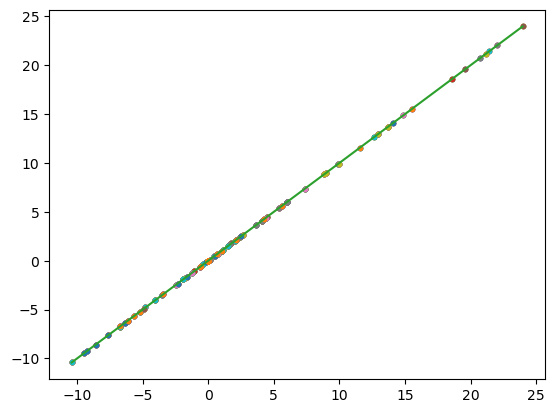

[]


[]


[[ 19.58639441  -5.20106043   5.97174846  -1.08868295   1.59590241]
 [ -5.20106043  11.54023204   5.42252644   2.43595685   0.47367219]
 [  5.97174846   5.42252644  22.02142864   1.02911488  -4.78644965]
 [ -1.08868295   2.43595685   1.02911488  18.58045645 -10.40916109]
 [  1.59590241   0.47367219  -4.78644965 -10.40916109  21.42913442]]


[[ 19.58639441  -5.20106043   5.97174846  -1.08868295   1.59590241]
 [ -5.20106043  11.54023204   5.42252644   2.43595685   0.47367219]
 [  5.97174846   5.42252644  22.02142864   1.02911488  -4.78644965]
 [ -1.08868295   2.43595685   1.02911488  18.58045645 -10.40916109]
 [  1.59590241   0.47367219  -4.78644965 -10.40916109  21.42913442]]


[[-0.52756114  7.37566484  6.003115    8.82512711 -4.06646241 -2.33649843
  -0.60872211]
 [ 4.44222709 -2.44640496  1.65886638  2.6359616  -0.47128754 -1.63339685
  -3.42717878]
 [-4.9224378   4.37120416  4.10688525  2.1077889   2.04397173 -8.57148583
  -6.70251824]
 [ 4.07926432  0.72167066  3.62660825

In [5]:

plt.plot(covg2,covg2est,linestyle='none',marker='.')
plt.plot([np.min(covg2), np.max(covg2)],[np.min(covg2), np.max(covg2)])
plt.show()


print(phiest)
print('\n')
print(phiest2)
print('\n')
print(PHI1est)
print('\n')
print(PHI1est2)
print('\n')
print(PSI1est)
print('\n')
print(PSI1est2)
print('\n')
print(PHILest)
print('\n')
print(PHILest2)






In [6]:
# test the grad2par function with approximate estimation (a small set of R vectors)

R = 10

npar = 0
for iL in np.arange(0,L):
    npar = npar + dim[iL] * dim[iL+1]
npar = npar.astype(int)
    
grad = np.random.normal(0.,1.,(npar,R))

grad = sqrtcovg2 @ grad

phiest,PHI1est,PSI1est,PHILest = sm.cov2par(L,dim,covg2)

phiest2,PHI1est2,PSI1est2,PHILest2 = sm.grad2par(L,dim,grad)

covg2est = sm.par2cov(L,dim,phiest2,PHI1est2,PSI1est2,PHILest2)


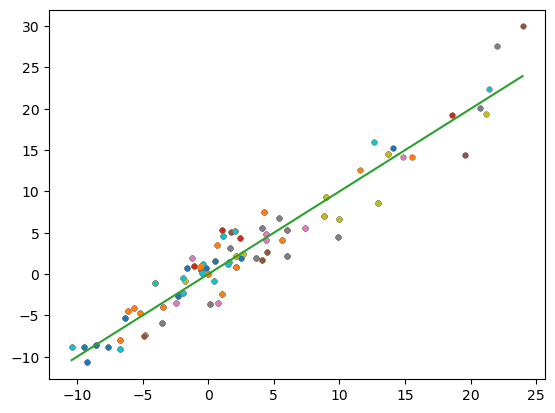

[]


[]


[[ 19.58639441  -5.20106043   5.97174846  -1.08868295   1.59590241]
 [ -5.20106043  11.54023204   5.42252644   2.43595685   0.47367219]
 [  5.97174846   5.42252644  22.02142864   1.02911488  -4.78644965]
 [ -1.08868295   2.43595685   1.02911488  18.58045645 -10.40916109]
 [  1.59590241   0.47367219  -4.78644965 -10.40916109  21.42913442]]


[[14.40313935 -4.73889102  5.38946173  0.95679737  1.47066167]
 [-4.73889102 12.57560197  6.76004596  4.38639877 -0.81292387]
 [ 5.38946173  6.76004596 27.53509771  5.28849132 -7.41517226]
 [ 0.95679737  4.38639877  5.28849132 19.28783089 -8.85805764]
 [ 1.47066167 -0.81292387 -7.41517226 -8.85805764 22.37360614]]


[[-0.52756114  7.37566484  6.003115    8.82512711 -4.06646241 -2.33649843
  -0.60872211]
 [ 4.44222709 -2.44640496  1.65886638  2.6359616  -0.47128754 -1.63339685
  -3.42717878]
 [-4.9224378   4.37120416  4.10688525  2.1077889   2.04397173 -8.57148583
  -6.70251824]
 [ 4.07926432  0.72167066  3.62660825  9.01098     1.09866918 

In [7]:

plt.plot(covg2,covg2est,linestyle='none',marker='.')
plt.plot([np.min(covg2), np.max(covg2)],[np.min(covg2), np.max(covg2)])
plt.show()


print(phiest)
print('\n')
print(phiest2)
print('\n')
print(PHI1est)
print('\n')
print(PHI1est2)
print('\n')
print(PSI1est)
print('\n')
print(PSI1est2)
print('\n')
print(PHILest)
print('\n')
print(PHILest2)

